<a href="https://colab.research.google.com/github/emanuelmad/sigmoidal_data_science/blob/main/Analisando_dados_do_Airbnb_na_cidade_de_Santiago_do_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# Análise dos Dados do Airbnb - Santiago, Chile

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

A idéia é que pessoas comuns possam, em seu dia a dia, compartilhar seus mundos para proporcionar aos hóspedes a sensação de conexão e o sentimento de se sentir em casa em qualquer lugar.

No final de 2020, a Startup fundada 10 anos atrás, já havia **hospedado mais de 800 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

<center><img alt="Analisando Airbnb"width="100%"src="https://news.airbnb.com/wp-content/uploads/sites/4/2021/01/PJM013419Q206-Seasonal_Chi-Day6_2-Fairfield_Home-02731-cropped.jpg?w=3000"></center>

**Uma das cidades mais encantadoras para se visitar é a capital do Chile, Santiago.** A cidade, sempre arborizada, encanta com seus atrativos históricos e naturais. Caminhar pelas suas ruas e andar de metrô é a certeza de poder desvendar quase todos os cantinhos de uma das cidades mais bonitas e organizadas da América do Sul.

**Neste *notebook*, iremos analisar os dados referentes à cidade de Santiago, Chile.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Santiago, Chile (good for visualisations).*

In [1]:
# Importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib  inline

In [2]:
# Importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/chile/rm/santiago/2020-12-24/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# Mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14576,Dp Valen Castillo 1600,14972,Bruno,NaN,Santiago,-33.46413,-70.64869,Entire home/apt,71871,5,0,NaN,NaN,1,0
1,30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,30000,7,8,2020-12-05,0.19,1,354
2,47936,My Flat in English,218471,Nelsk,NaN,Santiago,-33.44791,-70.63547,Private room,39529,1,0,NaN,NaN,1,0
3,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,38092,3,0,NaN,NaN,2,178
4,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,38810,1,45,2019-10-11,0.37,3,357


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [5]:
# Identificar o volume de dados do DataFrame
print ("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

#Verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11806
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [6]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.422751
last_review                       0.422751
name                              0.000593
host_name                         0.000339
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

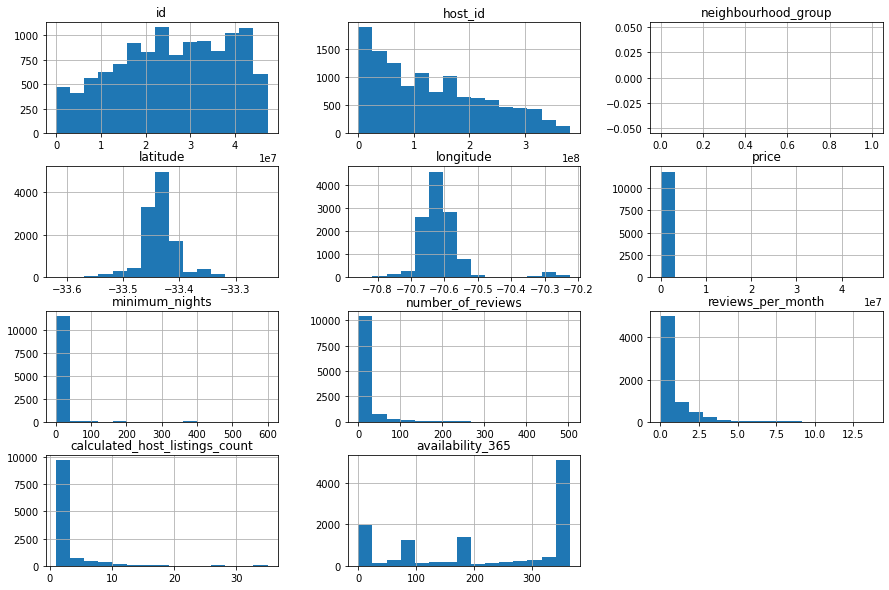

In [7]:
# Plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [10]:
# ver o resumo estatatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.180600e+04,11806.000000,11806.000000,6815.000000,11806.000000,11806.000000
mean,6.564946e+04,6.090124,13.421481,0.755324,2.691343,225.126122
std,7.033376e+05,23.464191,32.519526,1.099235,3.887700,143.330951
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.800000e+04,1.000000,0.000000,0.090000,1.000000,89.000000
50%,2.874800e+04,2.000000,1.000000,0.310000,1.000000,269.000000
75%,4.312300e+04,3.000000,10.000000,0.990000,2.000000,364.000000
max,4.671620e+07,600.000000,503.000000,13.730000,35.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 43123 pesos chilenos, porém seu valor máximo é 4671620.
* A quantidade mínima de noites (`minimum_nights`) está acima de 600 noites no ano.

#### Boxplot para minimum_nights

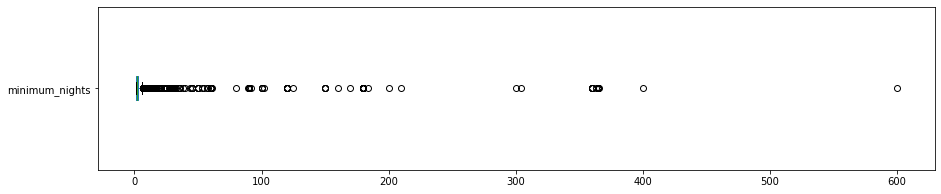

minimum_nights: valores acima de 30:
236 entradas
1.9990%


In [13]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

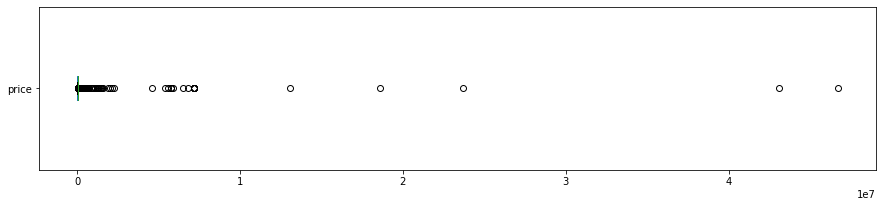


price: valores acima de 90000
819 entradas
6.9372%


In [15]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 90000 para price
print("\nprice: valores acima de 90000")
print("{} entradas".format(len(df[df.price > 90000])))
print("{:.4f}%".format((len(df[df.price > 90000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,80000), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`e `minimum_nights`, vamos agora limpar o *DataFrame* e plotar novamente o histograma.

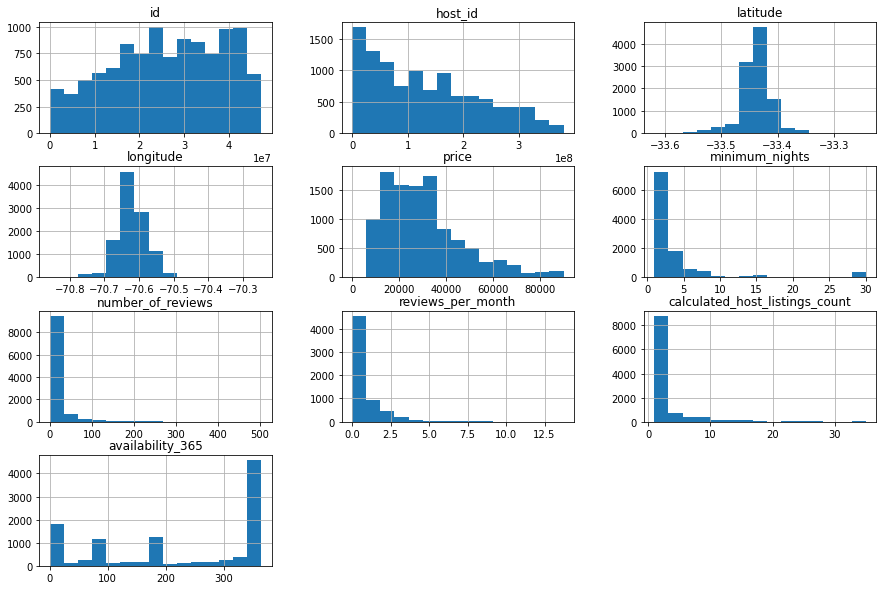

In [16]:
# Remover os *outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 90000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Remover `neighbourhood_group`, pois está vazio
df_clean.drop( 'neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [19]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.051226,0.003659,-0.005835,0.137080,0.076076
minimum_nights,-0.051226,1.000000,0.032143,-0.019282,-0.030311,-0.002608
number_of_reviews,0.003659,0.032143,1.000000,0.762242,0.037352,0.005958
reviews_per_month,-0.005835,-0.019282,0.762242,1.000000,0.092015,-0.008233
calculated_host_listings_count,0.137080,-0.030311,0.037352,0.092015,1.000000,0.137072
availability_365,0.076076,-0.002608,0.005958,-0.008233,0.137072,1.000000


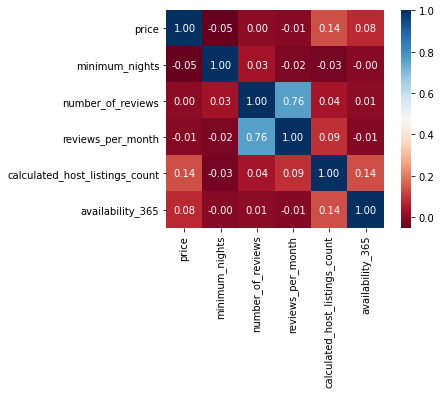

In [20]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [21]:
# Mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    5353
Private room       5041
Shared room         264
Hotel room          123
Name: room_type, dtype: int64

In [22]:
# Mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.496522
Private room       0.467582
Shared room        0.024488
Hotel room         0.011409
Name: room_type, dtype: float64

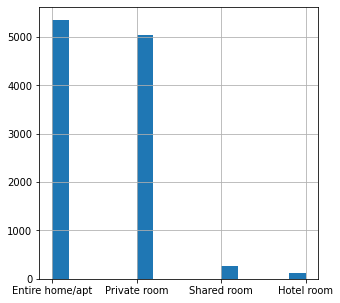

In [32]:
# plotar histograma

df_clean.room_type.hist(bins=15, figsize=(5,5));

### **Q6. Qual a localidade mais cara de Santiago?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [34]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lo Barnechea    41216.872000
Vitacura        38642.193916
Las Condes      37540.573512
La Pintana      35000.000000
Providencia     32881.253018
Pudahuel        31470.647059
Lo Espejo       30145.500000
Huechuraba      29593.557692
Santiago        28745.026576
Recoleta        27540.575540
Name: price, dtype: float64

Acima, observamos que bairros como Lo Barnechea, Vitacura e Las Condes, estão com média de preço superior a de lugares como Providencia e Santiago.
Entretanto, é importante frizar a disponibilidade de hospedagens nos bairros Providencia e Santiago são superiores aos demais, fazendo que a concorrência seja maior e consequentemente o preço mais em conta.
Pode-se levar em consideração também a idade dos imóveis, estrutura dos bairros, tamanho, etc.

**Essas informações podem facilitar a procura por estadia em bairros mais em conta.**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

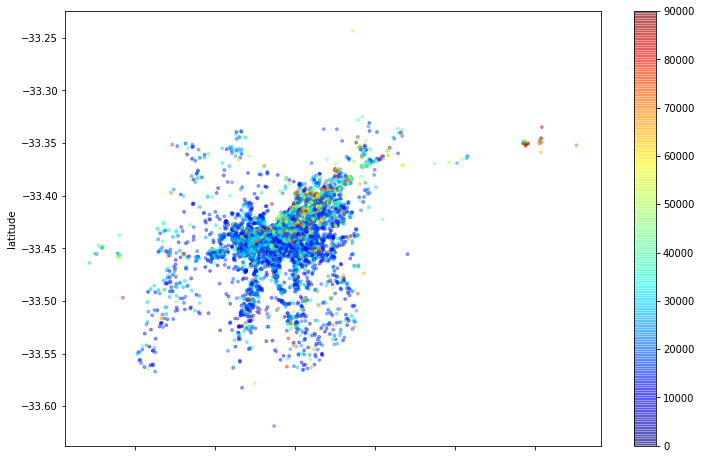

In [41]:
# Plotar os imóveis pela latitude - longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.